## Hoja de trabajo #1

Documento en el que se trabajará los incisos 1.5-2.4 de la Hoja de Trabajo #1.
Se hizo uso de la función read_csv para leer el archivo csv.
En caso se desee replicar, se recomienda tener el archivo en el mismo directorio en el cual se está trabajando, para evitar realizarle modificaciones al momento de replicarlo.

In [328]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [329]:
baseballData = pd.read_csv('baseball_reference_2016_scrape.csv')


In [330]:
baseballData = baseballData.drop([
  'boxscore_url',
  'other_info_string',
  'field_type'
],axis=1)
baseballData

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,date,game_duration,game_type,home_team,home_team_errors,home_team_hits,home_team_runs,start_time,venue
0,"40,030']",New York Mets,1,7,3,"Sunday, April 3, 2016",: 3:13,"Night Game, on grass",Kansas City Royals,0,9,4,Start Time: 7:38 p.m. Local,: Kauffman Stadium
1,"21,621']",Philadelphia Phillies,0,5,2,"Wednesday, April 6, 2016",: 2:23,"Night Game, on grass",Cincinnati Reds,0,8,3,Start Time: 7:11 p.m. Local,: Great American Ball Park
2,"12,622']",Minnesota Twins,0,5,2,"Wednesday, April 6, 2016",: 3:11,"Night Game, on grass",Baltimore Orioles,0,9,4,Start Time: 7:07 p.m. Local,: Oriole Park at Camden Yards
3,"18,531']",Washington Nationals,0,8,3,"Wednesday, April 6, 2016",: 2:53,"Night Game, on grass",Atlanta Braves,1,8,1,Start Time: 7:10 p.m. Local,: Turner Field
4,"18,572']",Colorado Rockies,1,8,4,"Wednesday, April 6, 2016",: 2:39,"Day Game, on grass",Arizona Diamondbacks,0,8,3,Start Time: 12:40 p.m. Local,: Chase Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,"31,042']",Toronto Blue Jays,2,7,5,"Sunday, April 3, 2016",: 2:51,"Day Game, on turf",Tampa Bay Rays,1,7,3,Start Time: 4:09 p.m. Local,: Tropicana Field
2459,"39,500']",St. Louis Cardinals,0,5,1,"Sunday, April 3, 2016",: 3:02,"Day Game, on grass",Pittsburgh Pirates,1,9,4,Start Time: 1:15 p.m. Local,: PNC Park
2460,"20,098']",San Francisco Giants,0,6,3,"Wednesday, April 6, 2016",: 3:19,"Day Game, on grass",Milwaukee Brewers,2,9,4,Start Time: 12:41 p.m. Local,: Miller Park
2461,"17,883']",Detroit Tigers,0,13,7,"Wednesday, April 6, 2016",: 3:22,"Day Game, on grass",Miami Marlins,1,10,3,Start Time: 4:57 p.m. Local,: Marlins Park


Se convierte la variable attendance a int

In [331]:
baseballData['attendance'] = baseballData['attendance'].str.replace("']", "")
baseballData['attendance'] = baseballData['attendance'].str.replace(",", "")


C:\Users\cordo\AppData\Local\Temp\ipykernel_8772\135181816.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  baseballData['attendance'] = baseballData['attendance'].str.replace("']", "")


In [332]:
# se borran aquellas lineas que no tengan corelacion con los datos (3 lineas de 2463 = 0.12% de la data no es relevante.)
indexes = []
for n in baseballData['attendance']:
  try:
    int(n)
  except:
    baseballData = baseballData[baseballData["attendance"] != n]


In [333]:
baseballData['attendance'] = baseballData['attendance'].astype(int)
baseballData[['attendance']]

,attendance
0,40030
1,21621
2,12622
3,18531
4,18572
...,...
2458,31042
2459,39500
2460,20098
2461,17883


Se comvierten las variables home_team y away_team a valores numericos

In [334]:
teams = baseballData['home_team'].unique()
teams = teams.tolist()

for i in teams:
    lineaIndiceH = baseballData[baseballData['home_team'] == i].index
    lineaIndiceA = baseballData[baseballData['away_team'] == i].index
    indexTEMP = teams.index(i)
    for index in lineaIndiceH:
        baseballData.loc[index, 'home_team'] = indexTEMP
        
    for index in lineaIndiceA:
        baseballData.loc[index, 'away_team'] = indexTEMP
baseballData[['home_team', 'away_team']]

,home_team,away_team
0,0,15
1,1,14
2,2,16
3,3,21
4,4,20
...,...,...
2458,6,22
2459,8,23
2460,11,24
2461,12,18


Se convierte game_duration a int (tiempo en minutos)

In [335]:
# limpiar game duration
for time in baseballData['game_duration']:
  if type(time) == int: continue
  indiceTime = baseballData[baseballData['game_duration'] == time].index
  x = int(time.split(":")[1]) * 60 + int(time.split(":")[2])
  for index in indiceTime:
    baseballData.loc[indiceTime,'game_duration'] = x
baseballData[['game_duration']]


,game_duration
0,193
1,143
2,191
3,173
4,159
...,...
2458,171
2459,182
2460,199
2461,202


Se convierte game_type 

In [336]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
baseballData['venue'] = encoder.fit_transform(baseballData['venue'])
baseballData['game_type'] = encoder.fit_transform(baseballData['game_type'])
baseballData[['game_type', 'venue']]

,game_type,venue
0,2,13
1,2,12
2,2,19
3,2,27
4,0,3
...,...,...
2458,1,26
2459,0,20
2460,0,15
2461,0,14


Limpiar variable date (convertir a datetime de numpy)

In [337]:
for date in baseballData['date']:
  if type(date) == np.datetime64: continue
  indiceDate = baseballData[baseballData['date'] == date].index
  splitdate = date.split(',')[1:]
  newdate = (splitdate[0].split(' ') + [splitdate[1]])[1:]

  match newdate[0]:
    case 'January':
      newdate[0] = '01'
    case 'February':
      newdate[0] = '02'
    case 'March':
      newdate[0] = '03'
    case 'April':
      newdate[0] = '04'
    case 'May':
      newdate[0] = '05'
    case 'June':
      newdate[0] = '06'
    case 'July':
      newdate[0] = '07'
    case 'August':
      newdate[0] = '08'
    case 'September':
      newdate[0] = '09'
    case 'October':
      newdate[0] = '10'
    case 'November':
      newdate[0] = '11'
    case 'December':
      newdate[0] = '12'

  newdate[1] = '0' + newdate[1] if len(newdate[1]) < 2 else newdate[1]
  newdate = f'{newdate[2]}-{newdate[0]}-{newdate[1]}'[1:]
  newdate = np.datetime64(newdate)

  baseballData.loc[indiceDate,'date'] = newdate

baseballData[['date']]

,date
0,2016-04-03
1,2016-04-06
2,2016-04-06
3,2016-04-06
4,2016-04-06
...,...
2458,2016-04-03
2459,2016-04-03
2460,2016-04-06
2461,2016-04-06


Limpiar variable start time ()

In [338]:
time = 'Start Time: 6:22 p.m. Local'
time = time.replace('Start Time: ', '')
time = time.replace(' Local', '')
time = time.split(' ')
time

newtime = time[0].split(':')
newtime[0] = str(int(newtime[0]) + 12) if time[1] == 'p.m.' else newtime[0]
newtime = newtime[0] + ":" + newtime[1] + ":" + "00"


# df['column_name'] = pd.to_datetime(df['column_name'], format='%H:%M:%S').dt.time = newtime[0] + ':' + newtime[1]
newtime

'18:22:00'

In [339]:
for time in baseballData['start_time']:
  if time[-3:] == ':00': continue
  indiceDate = baseballData[baseballData['start_time'] == time].index
  time = time.replace('Start Time: ', '')
  time = time.replace(' Local', '')
  time = time.split(' ')
  newtime = time[0].split(':')
  newtime[0] = str(int(newtime[0]) + 12) \
    if time[1] == 'p.m.' and newtime[0] != '12' \
    else newtime[0]

  newtime = newtime[0] + ":" + newtime[1] + ":" + "00"
  baseballData.loc[indiceDate, 'start_time'] = newtime

baseballData['start_time'] = pd.to_datetime(baseballData['start_time'], format='%H:%M:%S').dt.time
baseballData[['start_time']]

,start_time
0,19:38:00
1,19:11:00
2,19:07:00
3,19:10:00
4,12:40:00
...,...
2458,16:09:00
2459,13:15:00
2460,12:41:00
2461,16:57:00


Limpiar variable start_time

In [340]:
baseballData

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,date,game_duration,game_type,home_team,home_team_errors,home_team_hits,home_team_runs,start_time,venue
0,40030,15,1,7,3,2016-04-03,193,2,0,0,9,4,19:38:00,13
1,21621,14,0,5,2,2016-04-06,143,2,1,0,8,3,19:11:00,12
2,12622,16,0,5,2,2016-04-06,191,2,2,0,9,4,19:07:00,19
3,18531,21,0,8,3,2016-04-06,173,2,3,1,8,1,19:10:00,27
4,18572,20,1,8,4,2016-04-06,159,0,4,0,8,3,12:40:00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,31042,22,2,7,5,2016-04-03,171,1,6,1,7,3,16:09:00,26
2459,39500,23,0,5,1,2016-04-03,182,0,8,1,9,4,13:15:00,20
2460,20098,24,0,6,3,2016-04-06,199,0,11,2,9,4,12:41:00,15
2461,17883,18,0,13,7,2016-04-06,202,0,12,1,10,3,16:57:00,14


2.1. Siga los procedimientos vistos en clase para poder realizar una regresión lineal con los datos dados

In [341]:
baseballData = baseballData.drop([
  'start_time'
],axis=1)

from sklearn.model_selection import train_test_split
X = baseballData.iloc[:, :-1]
y = baseballData.iloc[:, -1]
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 1/3, random_state = 0)
baseballData

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,date,game_duration,game_type,home_team,home_team_errors,home_team_hits,home_team_runs,venue
0,40030,15,1,7,3,2016-04-03,193,2,0,0,9,4,13
1,21621,14,0,5,2,2016-04-06,143,2,1,0,8,3,12
2,12622,16,0,5,2,2016-04-06,191,2,2,0,9,4,19
3,18531,21,0,8,3,2016-04-06,173,2,3,1,8,1,27
4,18572,20,1,8,4,2016-04-06,159,0,4,0,8,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,31042,22,2,7,5,2016-04-03,171,1,6,1,7,3,26
2459,39500,23,0,5,1,2016-04-03,182,0,8,1,9,4,20
2460,20098,24,0,6,3,2016-04-06,199,0,11,2,9,4,15
2461,17883,18,0,13,7,2016-04-06,202,0,12,1,10,3,14


In [342]:
from sklearn.linear_model import LinearRegression
regresor = LinearRegression()
regresor.fit(X_entreno, y_entreno)

LinearRegression()

In [343]:
y_pred = regresor.predict(X_prueba)

ValueError: x and y must be the same size

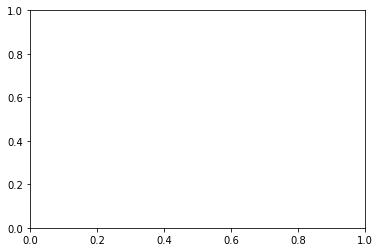

In [344]:
plt.scatter(X_entreno, y_entreno, color = 'red')
plt.plot(X_entreno, regresor.predict(X_entreno), color = 'blue')
plt.title('Salario vs Experiencia (Conjunto de entrenamiento)')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

In [ ]:
plt.scatter(X_prueba, y_prueba, color = 'red')
plt.plot(X_entreno, regresor.predict(X_entreno), color = 'blue')
plt.title('Salario vs Experiencia (Conjunto de prueba)')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

2.2. ¿Cuál es el rendimiento de su modelo? Calcule el parámetro R2 para dar
respaldo a su respuesta

In [ ]:
print(regresor.coef_)
print(regresor.intercept_)

2.3. Obtenga las constantes del modelo y exprese la ecuación que representan

2.4. Esta interesado en predecir cuál será la asistencia a un partido en el que se enfrenten X y Y equipos (Ud decide cuáles), así como el día de la semana, la hora y el estado (también los decide Ud) y otras variables que exija su modelo. Para estos valores, ¿cuál es la predicción de la asistencia?